# ETS Decomposition

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
#dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}

In [29]:
df=pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [30]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [31]:
#df['Value']

df_day=df.resample(rule='D').sum()

In [32]:
#df_day

df_day.drop(df_day.index[347], inplace=True)

In [33]:
series_day = df_day['Value']

In [34]:
series_day.head()

TS
2019-10-01    77324.7
2019-10-02    76038.6
2019-10-03    76977.6
2019-10-04    77042.7
2019-10-05    77223.0
Name: Value, dtype: float64

In [35]:
result_add = seasonal_decompose(series_day, model='additive', period=7)

In [36]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

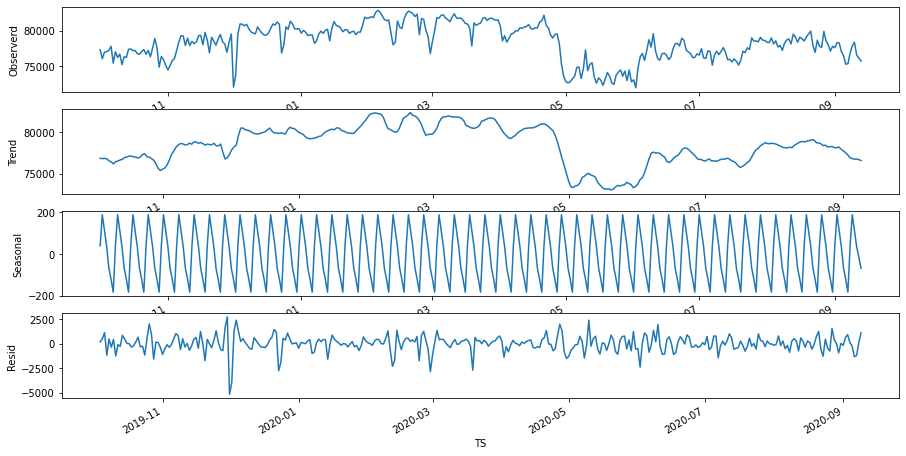

In [37]:
plot_decompose(result_add)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

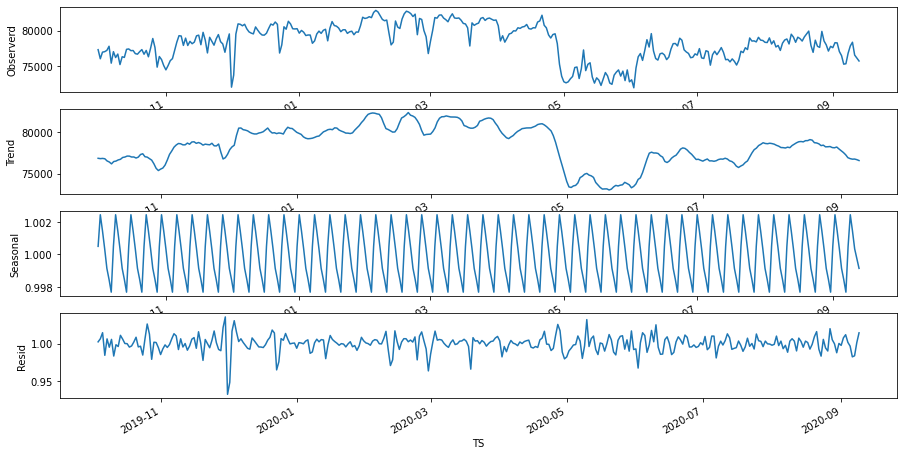

In [38]:
result_mul = seasonal_decompose(series_day, model='multiplicative', period=7)
plot_decompose(result_mul)

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [39]:
df=pd.read_excel('Total_final_kc.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [40]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [41]:
df.index = pd.to_datetime(df.index)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32255 entries, 2019-10-01 00:15:00 to 2020-08-31 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   32255 non-null  float64
dtypes: float64(1)
memory usage: 504.0 KB


In [21]:
#df.drop(['Dates'], axis=1, inplace=True)
df.drop(df.index[366], inplace=True)

In [43]:
df=df.resample(rule='D').sum()

In [44]:
df.head()

,Value
TS,
2019-10-01,77324.7
2019-10-02,76038.6
2019-10-03,76977.6
2019-10-04,77042.7
2019-10-05,77223.0


In [45]:
result = seasonal_decompose(df['Value'], model='multiplicative', freq=7)

<ipython-input-45-22721b35a6fb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['Value'], model='multiplicative', freq=7)


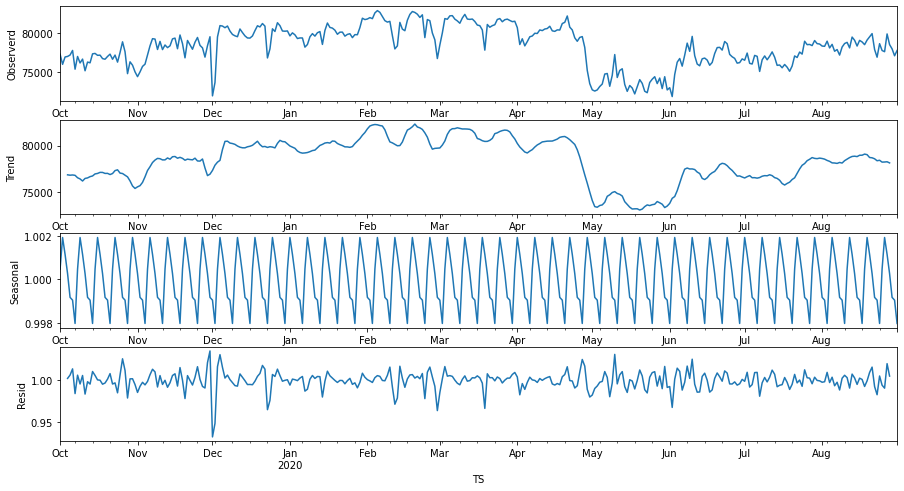

In [46]:
plot_decompose(result)